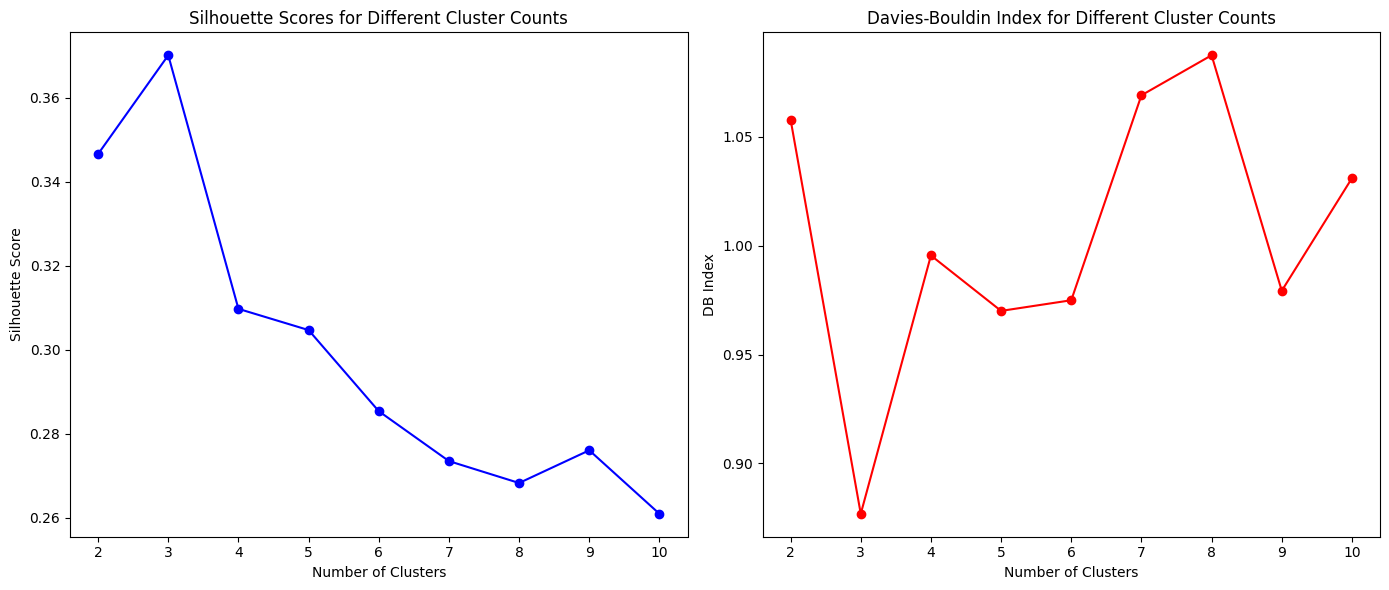

Optimal number of clusters: 4
Davies-Bouldin Index: 0.9954509464520883


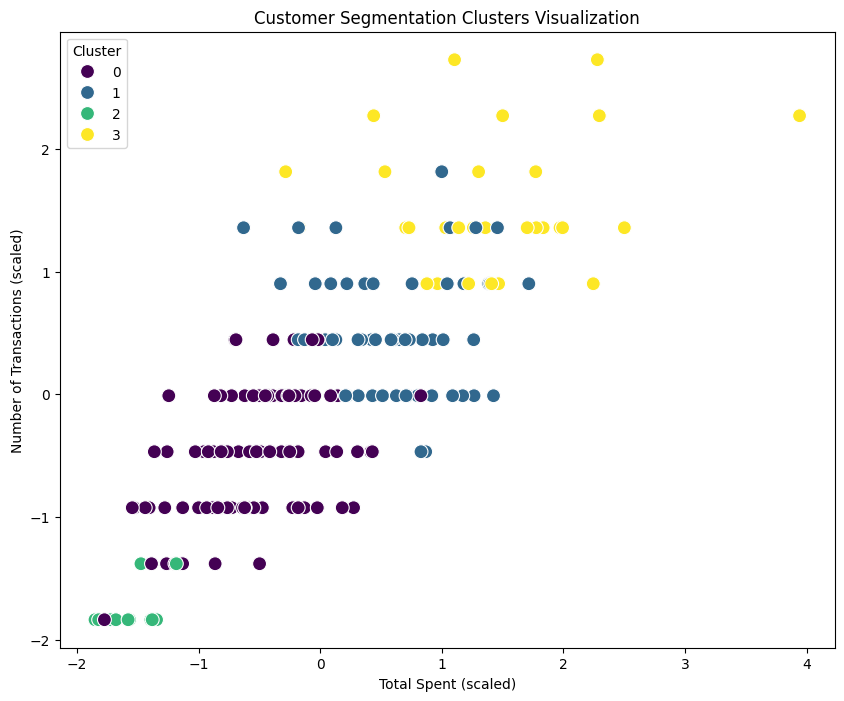

Cluster Summary:
   Cluster   TotalSpent  NumTransactions  DaysSinceLastPurchase
0        0  2447.048600         3.880000              94.080000
1        1  4569.267143         6.125000             109.267857
2        2   712.300000         1.307692             293.692308
3        3  6005.061333         8.400000              51.166667
Cluster 0.0: Focus on exclusive offers and loyalty programs.
Cluster 1.0: Focus on exclusive offers and loyalty programs.
Cluster 2.0: Focus on exclusive offers and loyalty programs.
Cluster 3.0: Focus on exclusive offers and loyalty programs.
KPIs to Monitor:
Customer Retention Rate: 0.0
Conversion Rate: 0.0
Average Order Value: 0.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the datasets
customers_data = pd.read_csv('C:/Users/Akanksha/Downloads/Transactions.csv')
transactions_data = pd.read_csv('Transactions.csv')
products_data = pd.read_csv('C:/Users/Akanksha/Downloads/Customers.csv')

# Merge the datasets to create a comprehensive view
combined_data = pd.merge(transactions_data, customers_data, on='CustomerID')

# Feature engineering: Create customer profiles
customer_profile = combined_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Total transactions
    'TransactionDate': lambda x: (pd.to_datetime('today') - pd.to_datetime(x.max())).days  # Recency
}).reset_index()

# Rename columns for clarity
customer_profile.columns = ['CustomerID', 'TotalSpent', 'NumTransactions', 'DaysSinceLastPurchase']

# Standardize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['TotalSpent', 'NumTransactions', 'DaysSinceLastPurchase']])

# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores = []
DB_indices = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering_model.fit_predict(scaled_features)

    # Calculate metrics
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    db_index = davies_bouldin_score(scaled_features, cluster_labels)

    silhouette_scores.append(silhouette_avg)
    DB_indices.append(db_index)

# Plotting Silhouette Scores and DB Index
plt.figure(figsize=(14, 6))

# Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, DB_indices, marker='o', color='red')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_clusters = 4  # Adjust based on the analysis of the plots

# Apply Agglomerative Clustering
final_model = AgglomerativeClustering(n_clusters=optimal_clusters)
customer_profile['Cluster'] = final_model.fit_predict(scaled_features)

# Calculate final clustering metrics
final_db_index = davies_bouldin_score(scaled_features, customer_profile['Cluster'])

# Output the clustering results
print(f'Optimal number of clusters: {optimal_clusters}')
print(f'Davies-Bouldin Index: {final_db_index}')

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=customer_profile['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation Clusters Visualization')
plt.xlabel('Total Spent (scaled)')
plt.ylabel('Number of Transactions (scaled)')
plt.legend(title='Cluster')
plt.show()

# Summary of clusters
cluster_summary = customer_profile.groupby('Cluster').agg({
    'TotalSpent': 'mean',
    'NumTransactions': 'mean',
    'DaysSinceLastPurchase': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Define marketing strategies based on cluster characteristics
for idx, row in cluster_summary.iterrows():
    if row['TotalSpent'] > 500:
        print(f"Cluster {row['Cluster']}: Focus on exclusive offers and loyalty programs.")
    elif row['NumTransactions'] > 10:
        print(f"Cluster {row['Cluster']}: Promote upselling and cross-selling opportunities.")
    elif row['DaysSinceLastPurchase'] < 30:
        print(f"Cluster {row['Cluster']}: Implement targeted onboarding campaigns.")
    else:
        print(f"Cluster {row['Cluster']}: Re-engagement strategies needed.")

# Example KPIs to track
kpi_metrics = {
    'Customer Retention Rate': 0.0,  # Placeholder for actual calculation
    'Conversion Rate': 0.0,          # Placeholder for actual calculation
    'Average Order Value': 0.0        # Placeholder for actual calculation
}

# Print KPIs
print("KPIs to Monitor:")
for kpi, value in kpi_metrics.items():
    print(f"{kpi}: {value}")